In [ ]:
#导入必要的库
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

#加载数据

In [4]:
#加载数据集
data_train=pd.read_csv('../data/train.csv')
data_test=pd.read_csv('../data/test.csv')
print(f"训练集为{data_train.shape}，测试集为{data_test.shape}")


训练集为(1460, 81)，测试集为(1459, 80)


In [9]:
#检查是否存在缺失值
print(f"训练集的缺失值情况为：{data_train.isnull().sum().sum()}")
print(f"测试集的缺失值情况为：{data_test.isnull().sum().sum()}")
#处理缺失值
num_cols=data_train.select_dtypes(include=[np.number]).columns
cat_cols=data_train.select_dtypes(include=[object]).columns
print(f"数值型特征有{len(num_cols)}个，类别型特征有{len(cat_cols)}个")

#使用众数填充字符型的缺失值
for col in cat_cols:
    data_train[col].fillna(data_train[col].mode()[0],inplace=True)
    data_test[col].fillna(data_test[col].mode()[0],inplace=True)
    
#使用均值填充数值型的缺失值
for col in num_cols:
    data_train[col].fillna(data_train[col].mean(),inplace=True)
    if col!= 'SalePrice':
        data_test[col].fillna(data_test[col].mean(),inplace=True)
#检查是否仍有缺失值
if data_train.isnull().sum().sum()==0 and data_test.isnull().sum().sum()==0:
    print("数据集处理完毕")
else:
    print("数据集仍有缺失值，请检查处理过程")


训练集的缺失值情况为：0
测试集的缺失值情况为：0
数值型特征有38个，类别型特征有43个
数据集处理完毕


C:\Users\王旭帆\AppData\Local\Temp\ipykernel_26912\281473731.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train[col].fillna(data_train[col].mode()[0],inplace=True)
C:\Users\王旭帆\AppData\Local\Temp\ipykernel_26912\281473731.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [13]:
#对数据工程进行处理

#将类别型特征进行独热编码
all_data=pd.concat([data_train.drop('SalePrice',axis=1),data_test],axis=0)
all_data=pd.get_dummies(all_data,drop_first=True)

#还原训练集和测试集
X=all_data.iloc[:data_train.shape[0]]
X_test=all_data.iloc[data_train.shape[0]:]
y=np.log1p(data_train['SalePrice'])


#划分训练集和验证集
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

#开始训练模型
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

#使用验证集进行评估
y_pred=model.predict(X_val)
rmse=np.sqrt(mean_squared_error(y_val,np.expm1(y_pred)))
print(f"验证集的RMSE为：{rmse}")

#在最终的测试集上面进行验证
test_pred=model.predict(X_test)
submission=pd.DataFrame({'Id':data_test['Id'],'SalePrice':test_pred})
submission.to_csv('../data/submission.csv',index=False)
print("预测结果已保存到submission.csv")

验证集的RMSE为：189965.65412913388
预测结果已保存到submission.csv


e:\avm\ado\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\avm\ado\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\avm\ado\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25151 (\N{CJK UNIFIED IDEOGRAPH-623F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\avm\ado\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\avm\ado\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\avm\ado\Lib\site-packa

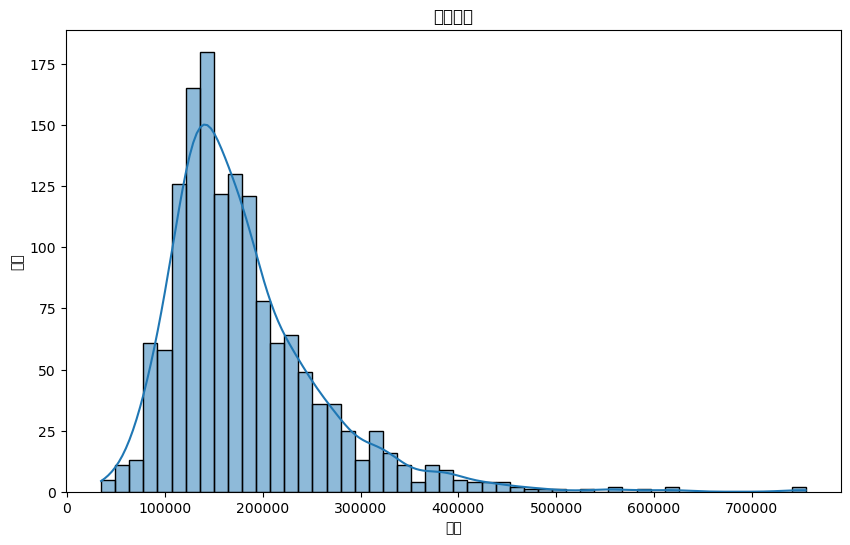

In [14]:
#绘制房价走势
plt.figure(figsize=(10,6))
sns.histplot(data_train['SalePrice'],bins=50,kde=True)
plt.title('房价分布')
plt.xlabel('房价')
plt.ylabel('频数')
plt.show()

特征重要性排名前十的特征为：
Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'GarageArea',
       'BsmtFinSF1', '1stFlrSF', 'CentralAir_Y', 'LotArea', 'YearBuilt'],
      dtype='object')


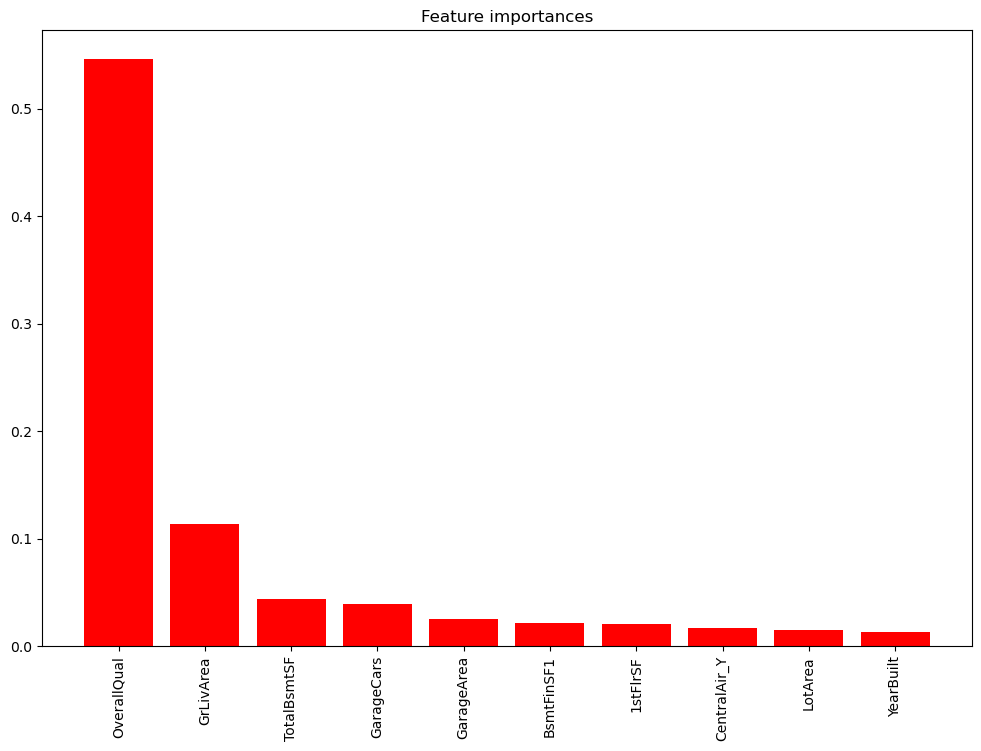

In [18]:
#绘制特征重要性图 取前十名
feature_importances=model.feature_importances_
indices=np.argsort(feature_importances)[::-1][0:10]
print("特征重要性排名前十的特征为：")
print(X.columns[indices])
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(len(indices)),feature_importances[indices],color="r",align="center")
plt.xticks(range(len(indices)),X.columns[indices],rotation=90)
plt.show()